# Customer Sentiment Analysis

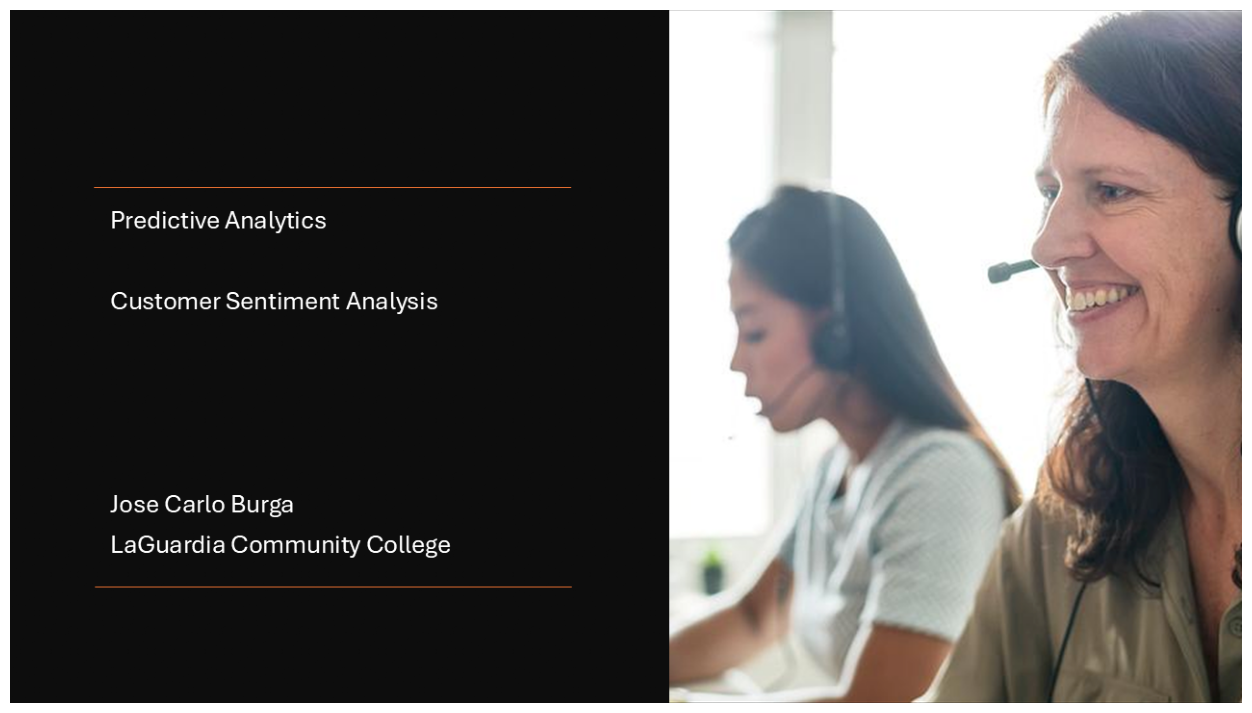

In [91]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the image path
image_path = r"C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\Personal\La Guardia\Predictive Analytics\Final Assignment - Ticket Classification\Customer Satisfaction Pic.png"

# Load the image
img = mpimg.imread(image_path)

# Display the image with adjusted figure size
plt.figure(figsize=(16, 9))  # Adjust figsize as needed (width, height in inches)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()


# Importing the necessary packages

In [92]:
import pandas as pd
from datetime import datetime, timedelta
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Loading the dataset

In [93]:
file_path = r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\Personal\La Guardia\Predictive Analytics\Final Assignment - Ticket Classification\customer_support_tickets.csv'

data = pd.read_csv(file_path)

# Dropping Unnecesary Features

In [94]:
data.drop(['Resolution', 'Customer Age','Customer Name',  'Customer Email', 'Ticket Subject', 'Ticket Description', 'First Response Time', 'Time to Resolution'], axis=1, inplace=True, errors='ignore')

# EDA

    # Summary of the dataset

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Gender               8469 non-null   object 
 2   Product Purchased             8469 non-null   object 
 3   Date of Purchase              8469 non-null   object 
 4   Ticket Type                   8469 non-null   object 
 5   Ticket Status                 8469 non-null   object 
 6   Ticket Priority               8469 non-null   object 
 7   Ticket Channel                8469 non-null   object 
 8   Customer Satisfaction Rating  2769 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 595.6+ KB


    # Column Names

In [96]:
data.columns

Index(['Ticket ID', 'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Status', 'Ticket Priority', 'Ticket Channel',
       'Customer Satisfaction Rating'],
      dtype='object')

# Handling Missing Values

    # Missing value analysis

In [97]:
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().mean() * 100).sort_values(ascending=False)

    # Combining  into a dataFrame for visualization

In [98]:
missing_analysis = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

    # Heatmap visualization of missing values

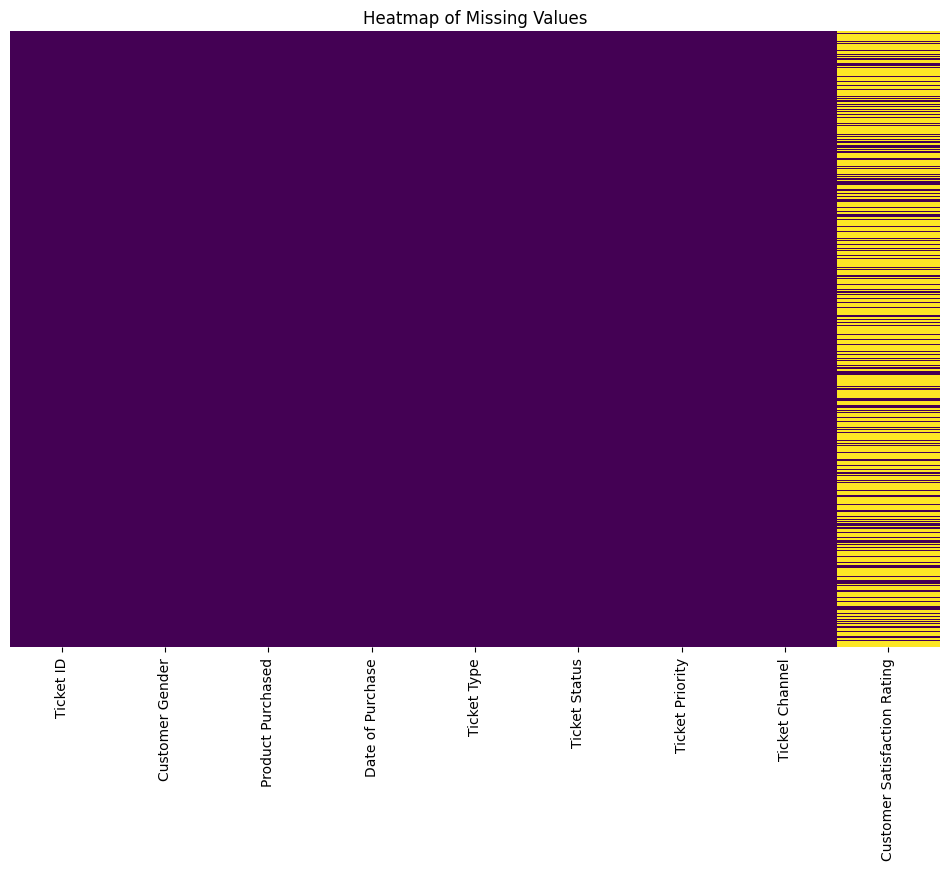

In [99]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()


    # Bar visualization of missing values

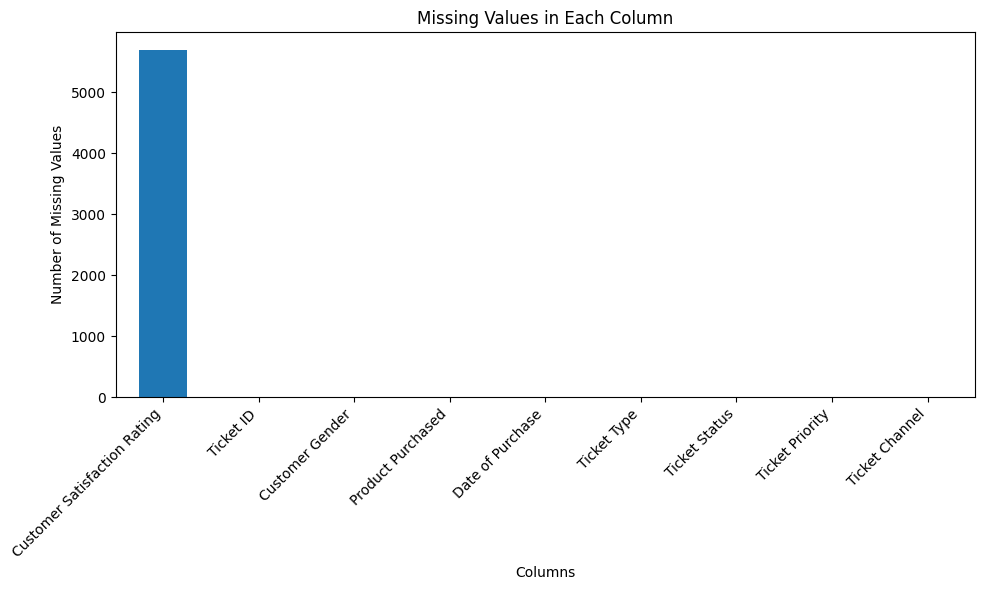

In [100]:
missing_values = data.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


    # Imputing Missing Values

In [101]:
# For numerical columns, using the median
numerical_columns = data.select_dtypes(include=['number']).columns
for col in numerical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# For categorical columns, using the mode
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\jcbur\AppData\Local\Temp\ipykernel_8224\2100482321.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


    # Verifying that there are no missing values remaining

In [102]:
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
Ticket ID                       0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Status                   0
Ticket Priority                 0
Ticket Channel                  0
Customer Satisfaction Rating    0
dtype: int64


    # Verifying that missing values have been imputed

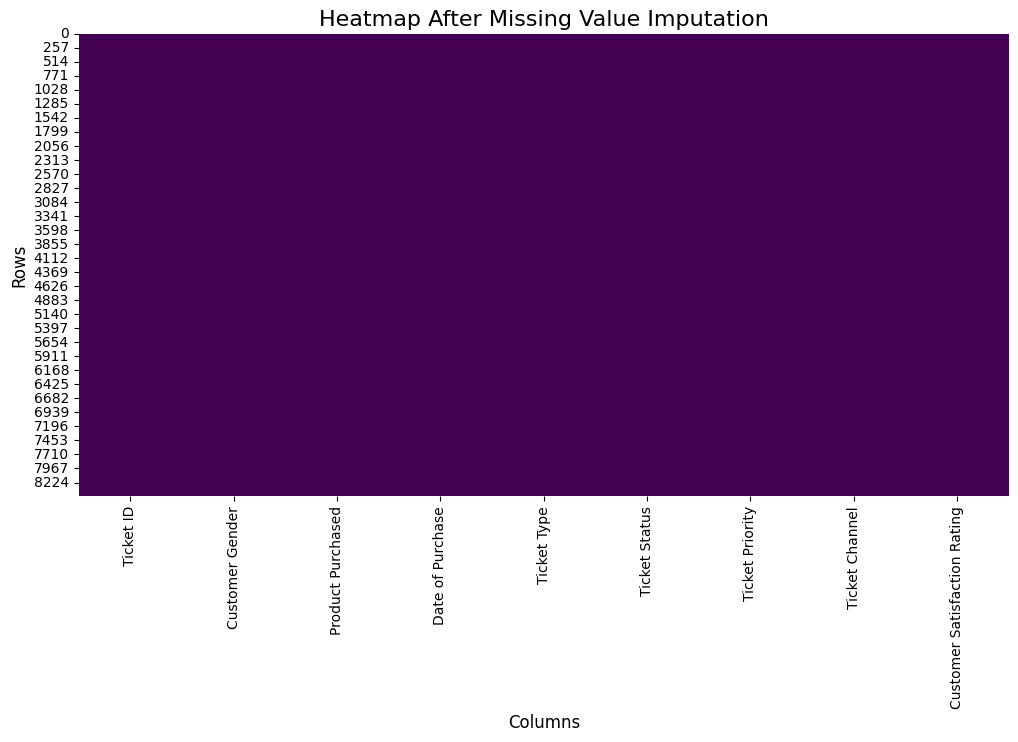

In [103]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap After Missing Value Imputation", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.show()

# Feature Engineering

    # Visualizing the dataframe

In [104]:
data.head() 

,Ticket ID,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Status,Ticket Priority,Ticket Channel,Customer Satisfaction Rating
0,1,Other,GoPro Hero,2021-03-22,Technical issue,Pending Customer Response,Critical,Social media,3.0
1,2,Female,LG Smart TV,2021-05-22,Technical issue,Pending Customer Response,Critical,Chat,3.0
2,3,Other,Dell XPS,2020-07-14,Technical issue,Closed,Low,Social media,3.0
3,4,Female,Microsoft Office,2020-11-13,Billing inquiry,Closed,Low,Social media,3.0
4,5,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Closed,Low,Email,1.0


    # Split categorical values into new columns

In [105]:
# Defining categorical features for one-hot encoding
categorical_features = ['Customer Gender', 'Ticket Type', 'Ticket Priority', 
    'Ticket Status', 'Ticket Channel'
]

# Perform one-hot encoding on the specified categorical features
data = pd.get_dummies(data, columns=categorical_features)

# Identify boolean columns (True/False values)
boolean_columns = data.select_dtypes(include=['bool']).columns

# Convert True/False to numeric (1/0) in boolean columns
data[boolean_columns] = data[boolean_columns].astype(int)

# Display the first few rows of the updated DataFrame
print(data.head())


   Ticket ID Product Purchased Date of Purchase  Customer Satisfaction Rating  \
0          1        GoPro Hero       2021-03-22                           3.0   
1          2       LG Smart TV       2021-05-22                           3.0   
2          3          Dell XPS       2020-07-14                           3.0   
3          4  Microsoft Office       2020-11-13                           3.0   
4          5  Autodesk AutoCAD       2020-02-04                           1.0   

   Customer Gender_Female  Customer Gender_Male  Customer Gender_Other  \
0                       0                     0                      1   
1                       1                     0                      0   
2                       0                     0                      1   
3                       1                     0                      0   
4                       1                     0                      0   

   Ticket Type_Billing inquiry  Ticket Type_Cancellation request  \


# Visualizing the dataframe again

In [106]:
data.head()

,Ticket ID,Product Purchased,Date of Purchase,Customer Satisfaction Rating,Customer Gender_Female,Customer Gender_Male,Customer Gender_Other,Ticket Type_Billing inquiry,Ticket Type_Cancellation request,Ticket Type_Product inquiry,...,Ticket Priority_High,Ticket Priority_Low,Ticket Priority_Medium,Ticket Status_Closed,Ticket Status_Open,Ticket Status_Pending Customer Response,Ticket Channel_Chat,Ticket Channel_Email,Ticket Channel_Phone,Ticket Channel_Social media
0,1,GoPro Hero,2021-03-22,3.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,LG Smart TV,2021-05-22,3.0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,3,Dell XPS,2020-07-14,3.0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,4,Microsoft Office,2020-11-13,3.0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
4,5,Autodesk AutoCAD,2020-02-04,1.0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [107]:
data.columns

Index(['Ticket ID', 'Product Purchased', 'Date of Purchase',
       'Customer Satisfaction Rating', 'Customer Gender_Female',
       'Customer Gender_Male', 'Customer Gender_Other',
       'Ticket Type_Billing inquiry', 'Ticket Type_Cancellation request',
       'Ticket Type_Product inquiry', 'Ticket Type_Refund request',
       'Ticket Type_Technical issue', 'Ticket Priority_Critical',
       'Ticket Priority_High', 'Ticket Priority_Low', 'Ticket Priority_Medium',
       'Ticket Status_Closed', 'Ticket Status_Open',
       'Ticket Status_Pending Customer Response', 'Ticket Channel_Chat',
       'Ticket Channel_Email', 'Ticket Channel_Phone',
       'Ticket Channel_Social media'],
      dtype='object')

# Encoding

# Correlation Analysis


Correlation Matrix:
                                         Ticket ID  \
Ticket ID                                 1.000000   
Customer Satisfaction Rating             -0.008135   
Customer Gender_Female                   -0.011317   
Customer Gender_Male                     -0.002134   
Customer Gender_Other                     0.013703   
Ticket Type_Billing inquiry               0.009465   
Ticket Type_Cancellation request         -0.010246   
Ticket Type_Product inquiry              -0.001100   
Ticket Type_Refund request               -0.001652   
Ticket Type_Technical issue               0.003629   
Ticket Priority_Critical                 -0.014469   
Ticket Priority_High                      0.002938   
Ticket Priority_Low                       0.000826   
Ticket Priority_Medium                    0.010632   
Ticket Status_Closed                      0.000617   
Ticket Status_Open                        0.002377   
Ticket Status_Pending Customer Response  -0.002975   
Ticket 

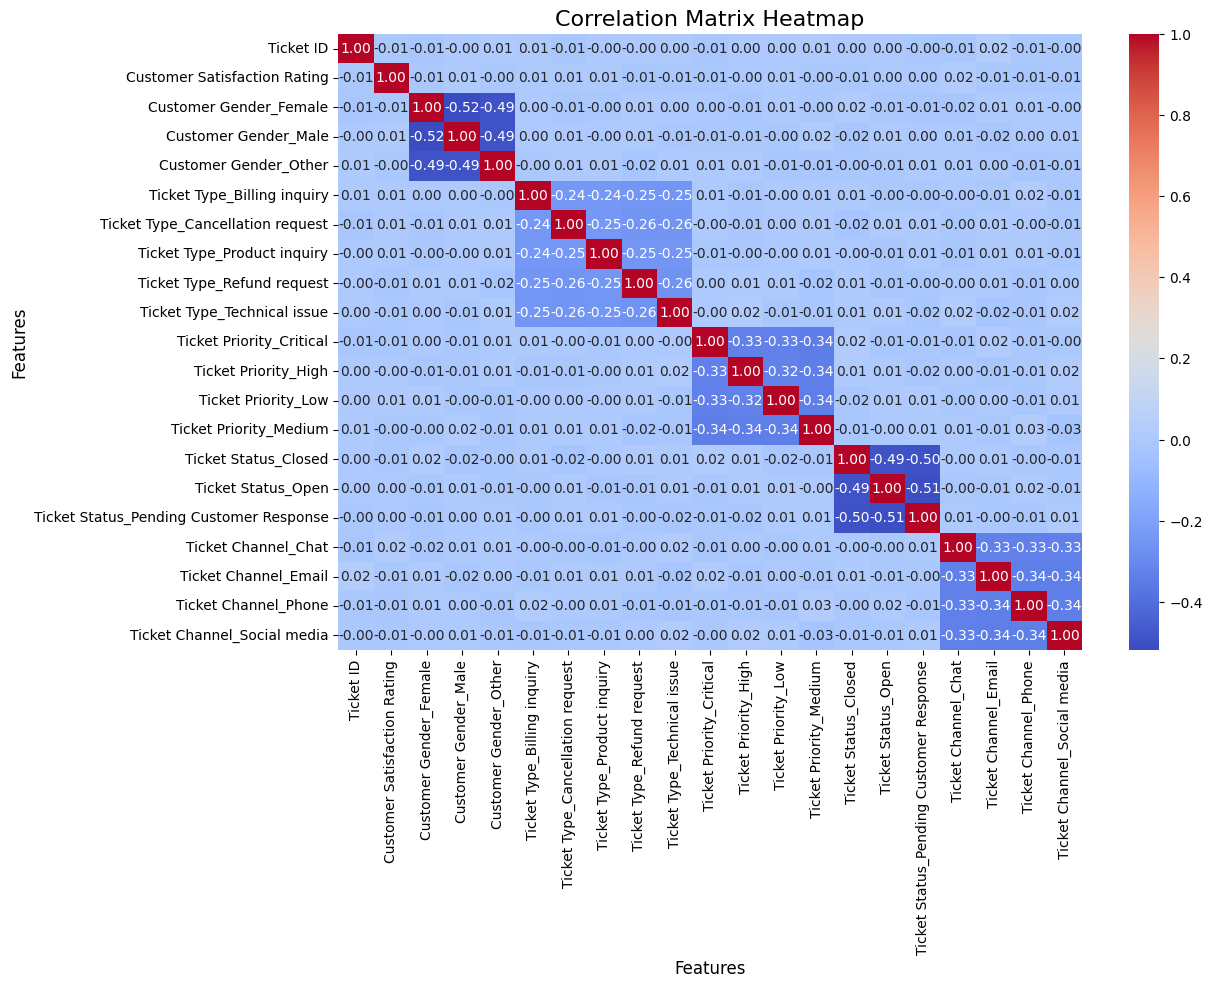

In [108]:
# Exclude non-numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['number'])

# Correlation analysis for numerical features
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualization of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()


# Displaying the new dataframe

In [109]:
data.head()

,Ticket ID,Product Purchased,Date of Purchase,Customer Satisfaction Rating,Customer Gender_Female,Customer Gender_Male,Customer Gender_Other,Ticket Type_Billing inquiry,Ticket Type_Cancellation request,Ticket Type_Product inquiry,...,Ticket Priority_High,Ticket Priority_Low,Ticket Priority_Medium,Ticket Status_Closed,Ticket Status_Open,Ticket Status_Pending Customer Response,Ticket Channel_Chat,Ticket Channel_Email,Ticket Channel_Phone,Ticket Channel_Social media
0,1,GoPro Hero,2021-03-22,3.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2,LG Smart TV,2021-05-22,3.0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,3,Dell XPS,2020-07-14,3.0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,4,Microsoft Office,2020-11-13,3.0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
4,5,Autodesk AutoCAD,2020-02-04,1.0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Ticket ID                                8469 non-null   int64  
 1   Product Purchased                        8469 non-null   object 
 2   Date of Purchase                         8469 non-null   object 
 3   Customer Satisfaction Rating             8469 non-null   float64
 4   Customer Gender_Female                   8469 non-null   int32  
 5   Customer Gender_Male                     8469 non-null   int32  
 6   Customer Gender_Other                    8469 non-null   int32  
 7   Ticket Type_Billing inquiry              8469 non-null   int32  
 8   Ticket Type_Cancellation request         8469 non-null   int32  
 9   Ticket Type_Product inquiry              8469 non-null   int32  
 10  Ticket Type_Refund request               8469 no

In [111]:
data.columns

Index(['Ticket ID', 'Product Purchased', 'Date of Purchase',
       'Customer Satisfaction Rating', 'Customer Gender_Female',
       'Customer Gender_Male', 'Customer Gender_Other',
       'Ticket Type_Billing inquiry', 'Ticket Type_Cancellation request',
       'Ticket Type_Product inquiry', 'Ticket Type_Refund request',
       'Ticket Type_Technical issue', 'Ticket Priority_Critical',
       'Ticket Priority_High', 'Ticket Priority_Low', 'Ticket Priority_Medium',
       'Ticket Status_Closed', 'Ticket Status_Open',
       'Ticket Status_Pending Customer Response', 'Ticket Channel_Chat',
       'Ticket Channel_Email', 'Ticket Channel_Phone',
       'Ticket Channel_Social media'],
      dtype='object')

# Dropping Column to reduce Collinearity

In [112]:
data.drop(['Customer Gender_Female',
       'Customer Gender_Male', 'Customer Gender_Other'], axis=1, inplace=True, errors='ignore')

In [113]:
# Correlation analysis for numerical features
correlation_matrix = data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualization of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

ValueError: could not convert string to float: 'GoPro Hero'

# Customer Sentiment Analysis 

Y = 'Customer Satisfaction Rating' 

1. Key metric in customer support scenarios
2. Low correlation with other variables
3. Minimal multicollinearity

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = data.drop('Customer Satisfaction Rating', axis=1)
y = data['Customer Satisfaction Rating']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7367178276269185
              precision    recall  f1-score   support

         1.0       0.17      0.14      0.15       115
         2.0       0.20      0.28      0.23       109
         3.0       0.86      0.95      0.90      1237
         4.0       0.33      0.10      0.16       126
         5.0       0.23      0.07      0.10       107

    accuracy                           0.74      1694
   macro avg       0.36      0.31      0.31      1694
weighted avg       0.69      0.74      0.70      1694



c:\Users\jcbur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.7249114521841794
              precision    recall  f1-score   support

         1.0       0.19      0.28      0.23       115
         2.0       0.14      0.19      0.16       109
         3.0       0.92      0.92      0.92      1237
         4.0       0.25      0.16      0.19       126
         5.0       0.20      0.11      0.14       107

    accuracy                           0.72      1694
   macro avg       0.34      0.33      0.33      1694
weighted avg       0.73      0.72      0.72      1694

